In [1240]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [1241]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [1242]:
file = tf.keras.utils
# raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
# raw_df.head()

#1M_one_res_small_leaks_ordered_group_3_0164_merged
raw_df1 = pd.read_csv('1M_one_res_small_leaks_ordered_group_0_merged.csv', delimiter=";")

leak_node = 5

leak_area = "0164" # "0246" #"0164"
leak_group = 1
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df2 = pd.read_csv(out_filename, delimiter=";")


leak_group = 2
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df3 = pd.read_csv(out_filename, delimiter=";")

leak_group = 3
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df4 = pd.read_csv(out_filename, delimiter=";")

leak_group = 4
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df5 = pd.read_csv(out_filename, delimiter=";")

leak_group = 5
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df6 = pd.read_csv(out_filename, delimiter=";")

leak_group = 6
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df7 = pd.read_csv(out_filename, delimiter=";")

leak_group = 7
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df8 = pd.read_csv(out_filename, delimiter=";")

# Appending multiple DataFrame
raw_df = pd.concat([raw_df1, raw_df2, raw_df3, raw_df4, raw_df5, raw_df6, raw_df7, raw_df8])
raw_df.reset_index(drop=True, inplace=True)
# raw_df.head()


leak_area = "0164" # "0246" #"0164"
leak_group = 3
leak_node = 8
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df_test = pd.read_csv(out_filename, delimiter=";")







In [1243]:
# columns = ["Index(['hour;nodeID;base_demand;demand_value;head_value;pressure_value;x_pos;y_pos;node_type;has_leak;leak_area_value;leak_discharge_value;leak_demand_value;flow_demand_in;demand_0;head_0;pressure_0;demand_1;head_1;pressure_1;demand_2;head_2;pressure_2;demand_3;head_3;pressure_3;demand_4;head_4;pressure_4;demand_5;head_5;pressure_5;demand_6;head_6;pressure_6;demand_7;head_7;pressure_7;demand_8;head_8;pressure_8;demand_9;head_9;pressure_9;flow_demand_out;leak_group'], dtype='object')"]

# column = ["flow_demand_in", "demand_0", "head_0", "pressure_0", "demand_1", "head_1", "pressure_1"]
# column = ['nodeID']
# ;demand_2;head_2;pressure_2;demand_3;head_3;pressure_3;demand_4;head_4;pressure_4;demand_5;head_5;pressure_5;demand_6;head_6;pressure_6;demand_7;head_7;pressure_7;demand_8;head_8;pressure_8;demand_9;head_9;pressure_9;flow_demand_out;leak_group'], dtype='object')"]

# print(raw_df.columns)
# raw_df.describe()


In [1244]:
cleaned_df = raw_df.copy()
cleaned_df_test = raw_df_test.copy()


# You don't want the `Time` column.
# cleaned_df.pop('Time')

#hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       # 'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak',
       # 'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
       # 'flow_demand_in', 'demand_0', 'head_0', 'pressure_0', 'demand_1',
       # 'head_1', 'pressure_1', 'demand_2', 'head_2', 'pressure_2', 'demand_3',
       # 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4', 'demand_5',
       # 'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6', 'demand_7',
       # 'head_7', 'pressure_7', 'demand_8', 'head_8', 'pressure_8', 'demand_9',
       # 'head_9', 'pressure_9', 'flow_demand_out', 'leak_group'


pop_col = ['hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       'pressure_value', 'x_pos', 'y_pos', 'node_type',
       'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
        # 'leak_group',
           'has_leak'
           ]

cleaned_df = cleaned_df.drop(pop_col, axis=1)
cleaned_df_test = cleaned_df_test.drop(pop_col, axis=1)

cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df.rename(columns = {'has_leak':'Class'}, inplace = True)


cleaned_df_test.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)



In [1245]:
neg, pos = np.bincount(cleaned_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 430080
    Positive: 47040 (10.94% of total)



In [1246]:

# The `Amount` column covers a huge range. Convert to log-space.
# eps = 0.001 # 0 => 0.1¢
# cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


In [1247]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)



test2_labels = np.array(cleaned_df_test.pop('Class'))
test2_features = np.array(cleaned_df_test)





In [1248]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test2_features = scaler.transform(test2_features)
test_features = scaler.transform(test_features)

# train_features = np.clip(train_features, -5, 5)
# val_features = np.clip(val_features, -5, 5)
# test2_features = np.clip(test2_features, -5, 5)
# test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('test 2 labels shape:', test2_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('test 2 features shape:', test2_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (275251,)
Validation labels shape: (68813,)
test 2 labels shape: (53760,)
Test labels shape: (86016,)
Training features shape: (275251, 32)
Validation features shape: (68813, 32)
test 2 features shape: (53760, 32)
Test features shape: (86016, 32)


In [1249]:
# sns.pairplot(cleaned_df.loc[0:200])

# plt.figure(figsize = (12,8))
# cmap = sns.diverging_palette(230,20,as_cmap=True)
# sns.heatmap(cleaned_df.loc[0:200].corr(),annot=True,fmt='.2f',cmap=cmap)
# plt.show()

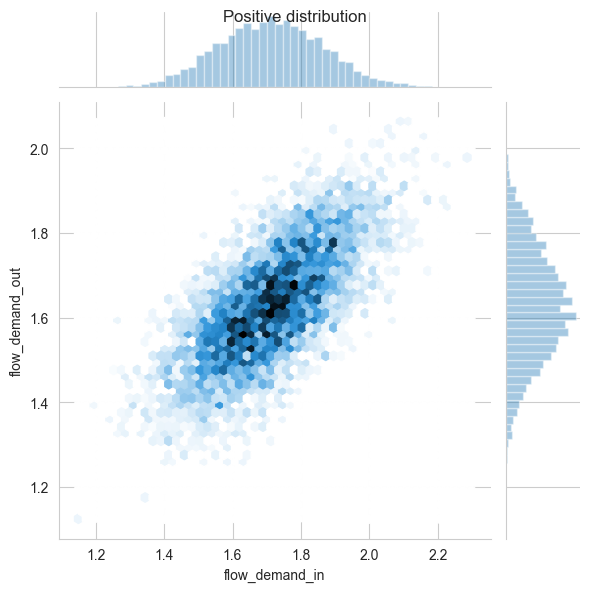

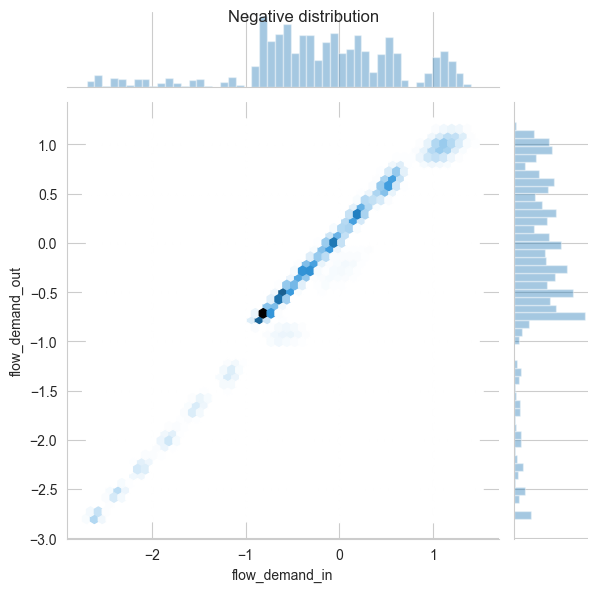

In [1250]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

# sns.jointplot(x=pos_df['flow_demand_in'], y=pos_df['flow_demand_out'],
#               kind='hex', xlim=(-0,1), ylim=(-0,1))
# plt.suptitle("Positive distribution")
#
# sns.jointplot(x=neg_df['flow_demand_in'], y=neg_df['flow_demand_out'],
#               kind='hex', xlim=(-3,3), ylim=(-3,3))

sns.jointplot(x=pos_df['flow_demand_in'], y=pos_df['flow_demand_out'],
              kind='hex')
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['flow_demand_in'], y=neg_df['flow_demand_out'],
              kind='hex')

_ = plt.suptitle("Negative distribution")


In [1251]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [1252]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


In [1253]:
model = make_model()
model.summary()


Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_356 (Dense)           (None, 16)                528       
                                                                 
 dropout_178 (Dropout)       (None, 16)                0         
                                                                 
 dense_357 (Dense)           (None, 1)                 17        
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [1254]:
model.predict(train_features[:10])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 63ms/step


array([[0.7194446 ],
       [0.58216596],
       [0.61428994],
       [0.9907325 ],
       [0.6052222 ],
       [0.6265725 ],
       [0.72677284],
       [0.9827622 ],
       [0.68059474],
       [0.663402  ]], dtype=float32)

In [1255]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loss: 1.5086


In [1256]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.09714112])

In [1257]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 59ms/step


array([[0.23435996],
       [0.18419851],
       [0.09792362],
       [0.43523103],
       [0.1635986 ],
       [0.21025708],
       [0.21719953],
       [0.25245172],
       [0.1481902 ],
       [0.11692575]], dtype=float32)

In [1258]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loss: 0.2843


In [1259]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)


In [1260]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [1261]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [1262]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


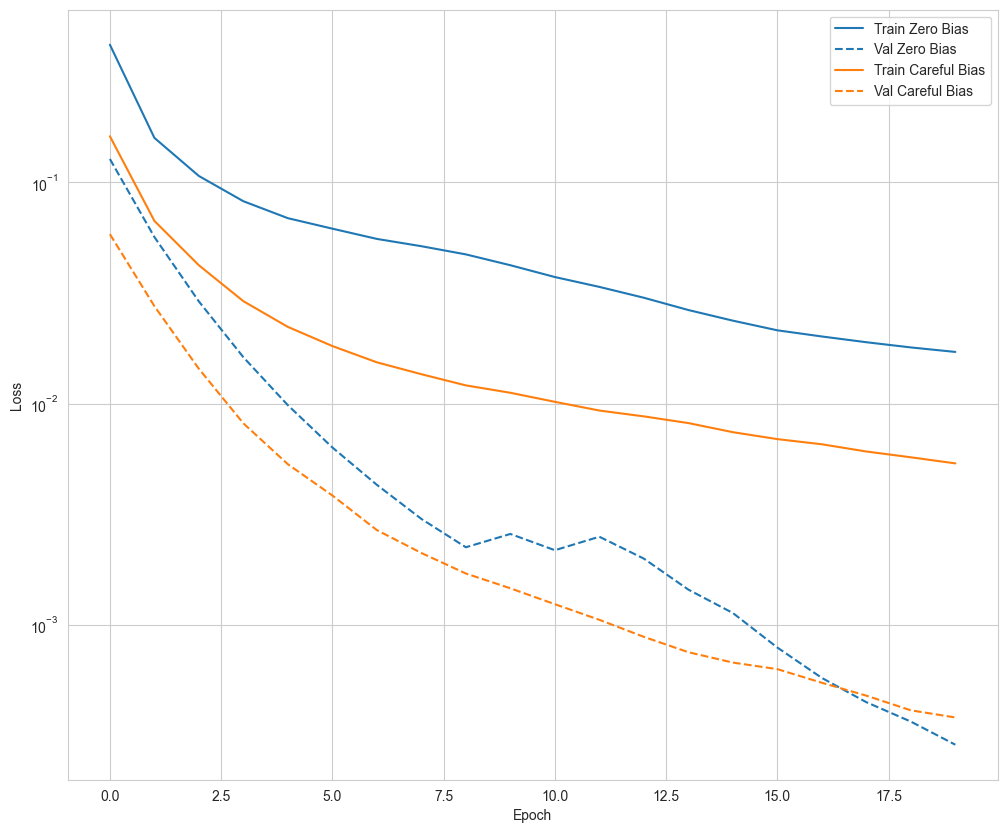

In [1263]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)


In [1264]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
130/135 [===========================>..] - ETA: 0s - loss: 0.1638 - tp: 29266.0000 - fp: 5910.0000 - tn: 292513.0000 - fn: 7364.0000 - accuracy: 0.9604 - precision: 0.8320 - recall: 0.7990 - auc: 0.9805 - prc: 0.8864WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A625499158> and will run it as-i

In [1265]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1.1])
    else:
      plt.ylim([0,1.1])

    plt.legend();


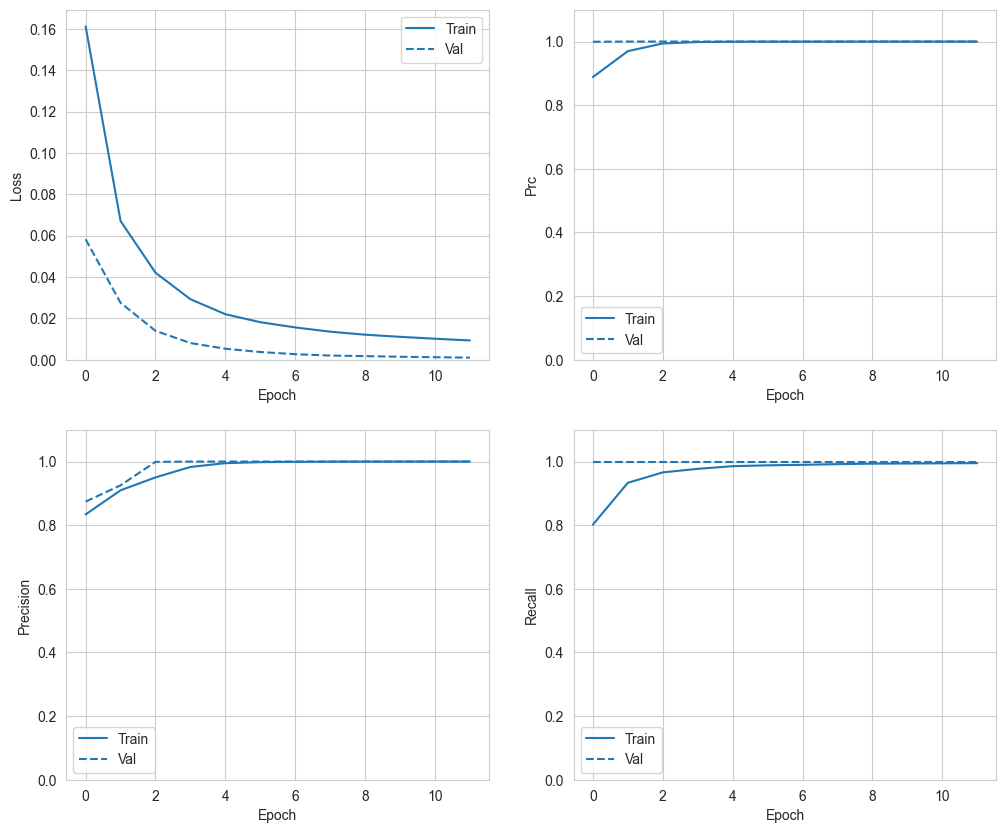

In [1266]:
plot_metrics(baseline_history)


In [1267]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)

test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
42/42 [==============================] - 0s 4ms/step


In [1268]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))


loss :  0.027776213362812996
tp :  9414.0
fp :  730.0
tn :  75872.0
fn :  0.0
accuracy :  0.991513192653656
precision :  0.9280362725257874
recall :  1.0
auc :  1.0
prc :  1.0

Legitimate Transactions Detected (True Negatives):  75872
Legitimate Transactions Incorrectly Detected (False Positives):  730
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  9414
Total Fraudulent Transactions:  9414


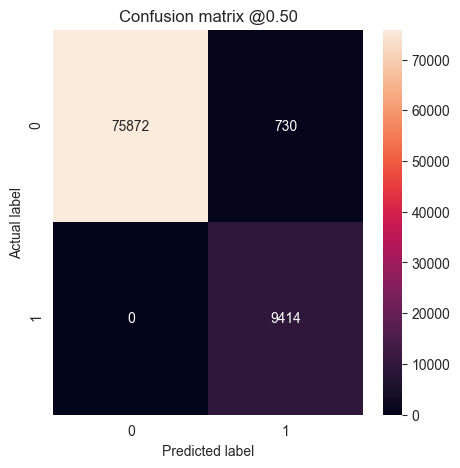

In [1269]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)


27/27 [==============================] - 0s 3ms/step
loss :  0.017383664846420288
tp :  6720.0
fp :  0.0
tn :  47040.0
fn :  0.0
accuracy :  1.0
precision :  1.0
recall :  1.0
auc :  1.0
prc :  1.0

Legitimate Transactions Detected (True Negatives):  47040
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  6720
Total Fraudulent Transactions:  6720


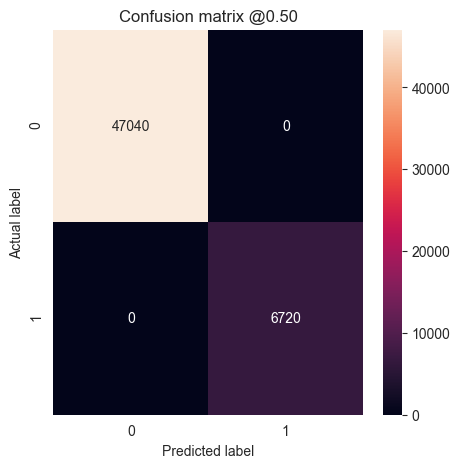

In [1270]:
test2_predictions_baseline = model.predict(test2_features, batch_size=BATCH_SIZE)

baseline_results = model.evaluate(test2_features, test2_labels, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test2_labels, test2_predictions_baseline)

In [1271]:
# def plot_roc(name, labels, predictions, **kwargs):
#   fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
#
#   plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
#   plt.xlabel('False positives [%]')
#   plt.ylabel('True positives [%]')
#   plt.xlim([-0.5,20])
#   plt.ylim([80,100.5])
#   plt.grid(True)
#   ax = plt.gca()
#   ax.set_aspect('equal')


In [1272]:
# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
# plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
# plt.legend(loc='lower right');


1M_one_res_small_leaks_ordered_group_7_node_7_0164_merged.csv
27/27 [==============================] - 0s 3ms/step
loss :  0.017336614429950714
tp :  6720.0
fp :  0.0
tn :  47040.0
fn :  0.0
accuracy :  1.0
precision :  1.0
recall :  1.0
auc :  1.0
prc :  1.0

Legitimate Transactions Detected (True Negatives):  47040
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  6720
Total Fraudulent Transactions:  6720


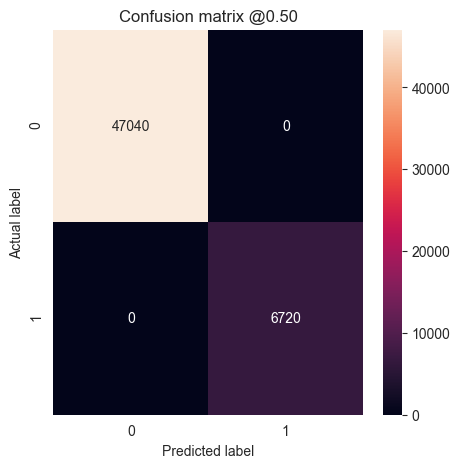

In [1292]:
leak_group_final_test = 7 #3


leak_node_final_test = 7


leak_area_final_test = "0164" # "0246" #"0164"

out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
print(out_filename)
raw_df_test_2 = pd.read_csv(out_filename, delimiter=";")

cleaned_df_test_2 = raw_df_test_2.copy()
cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)

cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)

test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
test2_features_2 = np.array(cleaned_df_test_2)

test2_features_2 = scaler.transform(test2_features_2)

test2_predictions_baseline = model.predict(test2_features_2, batch_size=BATCH_SIZE)


baseline_results = model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test2_labels_2, test2_predictions_baseline)

